# Clase 2 - Semana 3
#### Tópicos Selectos De Matemáticas Aplicadas II: Análisis de Datos con Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ruta_2020 = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/homicidios_2020.csv'
df_20 = pd.read_csv(ruta_2020,index_col='Estado')  
df_20.head()

,Abreviatura,Regiones,Mujeres,Hombres,No_esp
Estado,,,,,
Aguascalientes,AG,Noreste,7,86,0
Baja California,BC,Noroeste,298,2563,106
Baja California Sur,BS,Noroeste,7,71,0
Campeche,CM,Sureste,7,69,0
Coahuila de Zaragoza,CO,Noreste,33,209,0


In [3]:
ruta_poblacion = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/poblacion.csv'
df_poblacion = pd.read_csv(ruta_poblacion,index_col='Estado')  
df_poblacion.head()

,Regiones,H_1990,M_1990,H_2000,M_2000,H_2010,M_2010,H_2020,M_2020
Estado,,,,,,,,,
Aguascalientes,Noreste,350218,369441,456533,487752,576638,608358,696683,728924
Baja California,Noroeste,832090,828765,1252581,1234786,1591610,1563460,1900589,1868431
Baja California Sur,Noroeste,161833,155931,216250,207791,325433,311593,405879,392568
Campeche,Sureste,268772,266413,344334,346355,407721,414720,456939,471424
Coahuila de Zaragoza,Noreste,979097,993243,1140195,1157875,1364197,1384194,1563669,1583102


In [4]:
df_20['Total'] = df_20['Mujeres'] + df_20['Hombres'] + df_20['No_esp']

In [5]:
df_20.head()

,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total
Estado,,,,,,
Aguascalientes,AG,Noreste,7,86,0,93
Baja California,BC,Noroeste,298,2563,106,2967
Baja California Sur,BS,Noroeste,7,71,0,78
Campeche,CM,Sureste,7,69,0,76
Coahuila de Zaragoza,CO,Noreste,33,209,0,242


In [6]:
df_20['Poblacion'] = df_poblacion['H_2020'] + df_poblacion['M_2020']

In [7]:
df_20.head()

,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total,Poblacion
Estado,,,,,,,
Aguascalientes,AG,Noreste,7,86,0,93,1425607
Baja California,BC,Noroeste,298,2563,106,2967,3769020
Baja California Sur,BS,Noroeste,7,71,0,78,798447
Campeche,CM,Sureste,7,69,0,76,928363
Coahuila de Zaragoza,CO,Noreste,33,209,0,242,3146771


$$
\text{Tasa}_{100k}=\frac{\text{homicidios}}{\text{poblacion}}\times 100,000
$$

In [8]:
df_20['tasa'] = (df_20['Total'] / df_20['Poblacion']) * 100_000

In [9]:
df_20.head()

,Abreviatura,Regiones,Mujeres,Hombres,No_esp,Total,Poblacion,tasa
Estado,,,,,,,,
Aguascalientes,AG,Noreste,7,86,0,93,1425607,6.523537
Baja California,BC,Noroeste,298,2563,106,2967,3769020,78.720728
Baja California Sur,BS,Noroeste,7,71,0,78,798447,9.768964
Campeche,CM,Sureste,7,69,0,76,928363,8.186453
Coahuila de Zaragoza,CO,Noreste,33,209,0,242,3146771,7.690423


In [10]:
df_20 = df_20.sort_values(by='tasa')

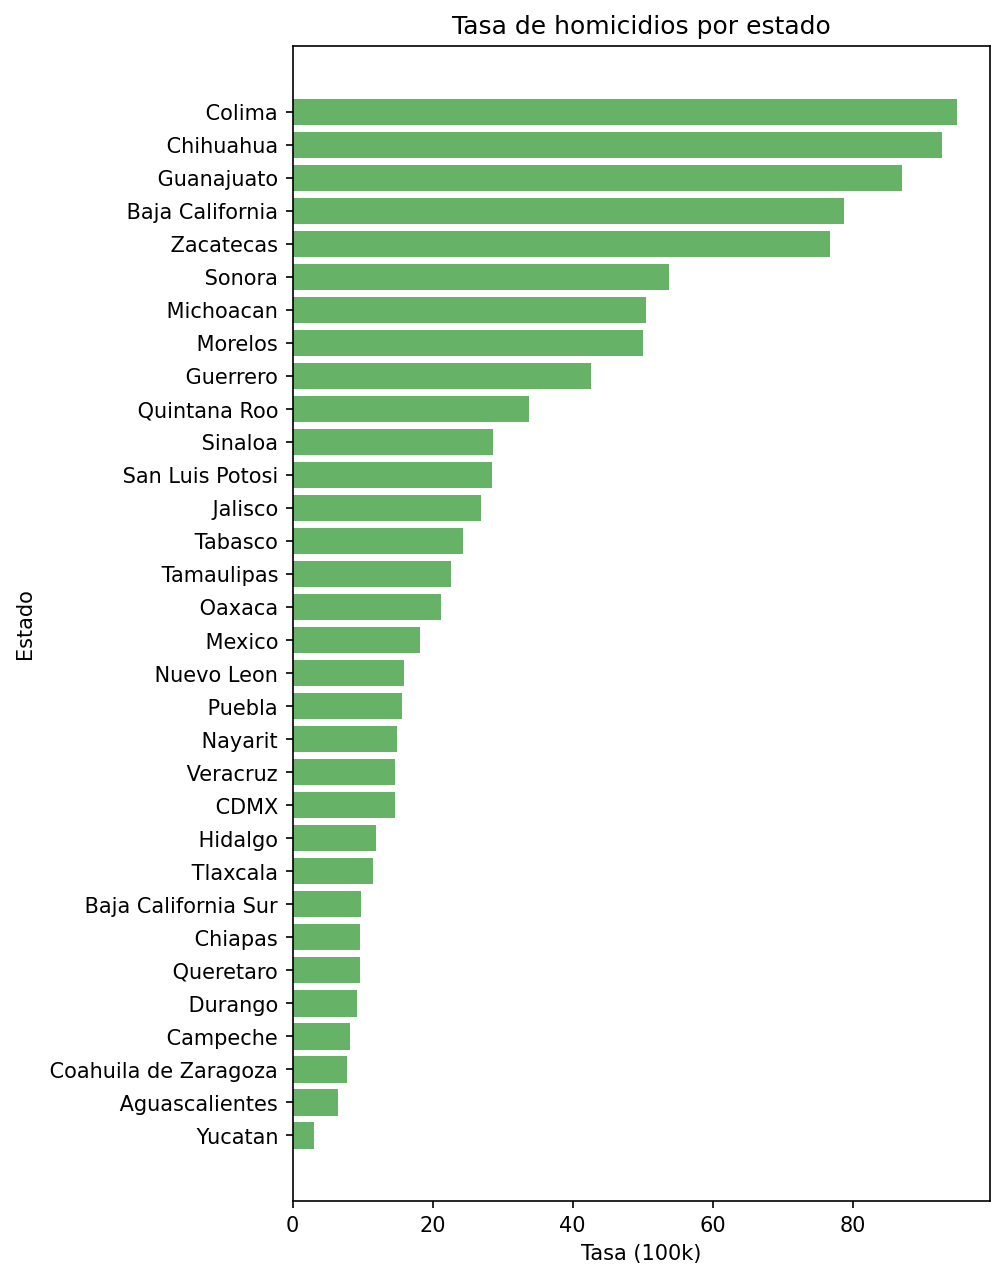

In [11]:
plt.figure(figsize=(6, 10), dpi=150)
plt.barh(df_20.index, df_20['tasa'], color = 'green', alpha=0.6)
plt.title('Tasa de homicidios por estado')
plt.ylabel('Estado')
plt.xlabel('Tasa (100k)')
plt.show()

Una **serie temporal** es una colección de datos indexados por un tiempo $t$, es decir,   ordenados cronológicamente.  La indexación $t$ de una serie temporal debe ser en intervalos de una misma longitud, tales como anual, mensual, semanal, diaria, por hora, etc. 

In [80]:
ruta = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/CEMEXCPO.csv'

In [81]:
df = pd.read_csv(ruta)
df.head()

,Date,Open,High,Low,Close,Adj Close
0,2022-07-01,7.77,7.93,7.71,7.81,7.81
1,2022-07-04,7.80,7.91,7.71,7.75,7.75
2,2022-07-05,7.70,8.05,7.56,8.01,8.01
3,2022-07-06,8.04,8.20,7.95,8.04,8.04
4,2022-07-07,8.09,8.27,8.00,8.03,8.03


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.9+ KB


In [83]:
df['Date'] = pd.to_datetime(df['Date'])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 11.9 KB


In [85]:
df = df.set_index("Date")

In [86]:
df

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-07-01,7.77,7.93,7.71,7.81,7.81
2022-07-04,7.80,7.91,7.71,7.75,7.75
2022-07-05,7.70,8.05,7.56,8.01,8.01
2022-07-06,8.04,8.20,7.95,8.04,8.04
2022-07-07,8.09,8.27,8.00,8.03,8.03
...,...,...,...,...,...
2023-06-26,11.91,12.09,11.79,11.82,11.82
2023-06-27,11.82,12.17,11.72,12.04,12.04
2023-06-28,12.06,12.11,11.85,11.90,11.90


#### Aplicación y asignación de funciones

In [87]:
df.sum() 
# axis='columns'
# skipna=False Para no excluir valores nulos

Open         2300.04
High         2339.42
Low          2266.74
Close        2304.99
Adj Close    2304.99
dtype: float64

**.mean()** requieren al menos un valor no nulo para producir un resultado con valor

In [88]:
df.mean(axis='columns')

Date
2022-07-01     7.806
2022-07-04     7.784
2022-07-05     7.866
2022-07-06     8.054
2022-07-07     8.084
               ...  
2023-06-26    11.886
2023-06-27    11.958
2023-06-28    11.964
2023-06-29    11.976
2023-06-30    12.058
Length: 252, dtype: float64

Los métodos como **.idxmin()** e **.idxmax()**, devuelven el valor de índice en el que se alcanzan los valores mínimo y máximo:

In [89]:
df.idxmax()

Open        2023-06-16
High        2023-06-15
Low         2023-06-15
Close       2023-06-15
Adj Close   2023-06-15
dtype: datetime64[ns]

In [90]:
df.idxmin()

Open        2022-10-17
High        2022-10-14
Low         2022-10-14
Close       2022-10-14
Adj Close   2022-10-14
dtype: datetime64[ns]

In [91]:
df.idxmin()[3]

Timestamp('2022-10-14 00:00:00')

In [92]:
df.loc[df.idxmin()[3]][3]

6.5

In [93]:
df.loc[df.idxmax()[3]][3]

12.53

| **Método**             | **Descripción**                                                                 |
|------------------------|----------------------------------------------------------------------------------|
| `count`                | Número de valores que no son nulos.                                              |
| `describe`             | Calcula un conjunto de estadísticas de resumen.                                 |
| `min`, `max`           | Calcula los valores mínimo y máximo.                                            |
| `argmin`, `argmax`     | Calcula ubicaciones de índice (enteros) en las que se obtienen los valores mínimo o máximo, respectivamente; no está disponible con objetos DataFrame. |
| `idxmin`, `idxmax`     | Calcula etiquetas de índice en las que se obtienen los valores mínimo o máximo, respectivamente. |
| `quantile`             | Calcula el cuantil de muestra entre 0 y 1 (valor predeterminado: 0.5).           |
| `sum`                  | Suma de valores.                                                                |
| `mean`                 | Promedio de valores.                                                            |
| `median`               | Media aritmética (50 % cuantil) de valores.                                     |
| `mad`                  | Desviación media absoluta del valor promedio.                                   |
| `prod`                 | Producto de todos los valores.                                                  |
| `var`                  | Varianza de los valores de muestra.                                             |
| `std`                  | Desviación estándar de los valores de muestra.                                  |
| `skew`                 | Asimetría (tercer momento) de los valores de muestra.                           |
| `kurt`                 | Curtosis (cuarto momento) de los valores de muestra.                            |
| `cumsum`               | Suma acumulada de los valores.                                                  |
| `cummin`, `cummax`     | Mínimo o máximo acumulado de los valores, respectivamente.                      |
| `cumprod`              | Producto acumulado de valores.                                                  |
| `diff`                 | Calcula la primera diferencia aritmética (útil para series temporales).         |
| `pct_change`           | Calcula cambios de porcentaje.                                                  |


Precio de cierre más bajo:  6.5 , fecha:  2022-10-14 00:00:00
Precio de cierre más alto:  12.53 , fecha:  2023-06-15 00:00:00


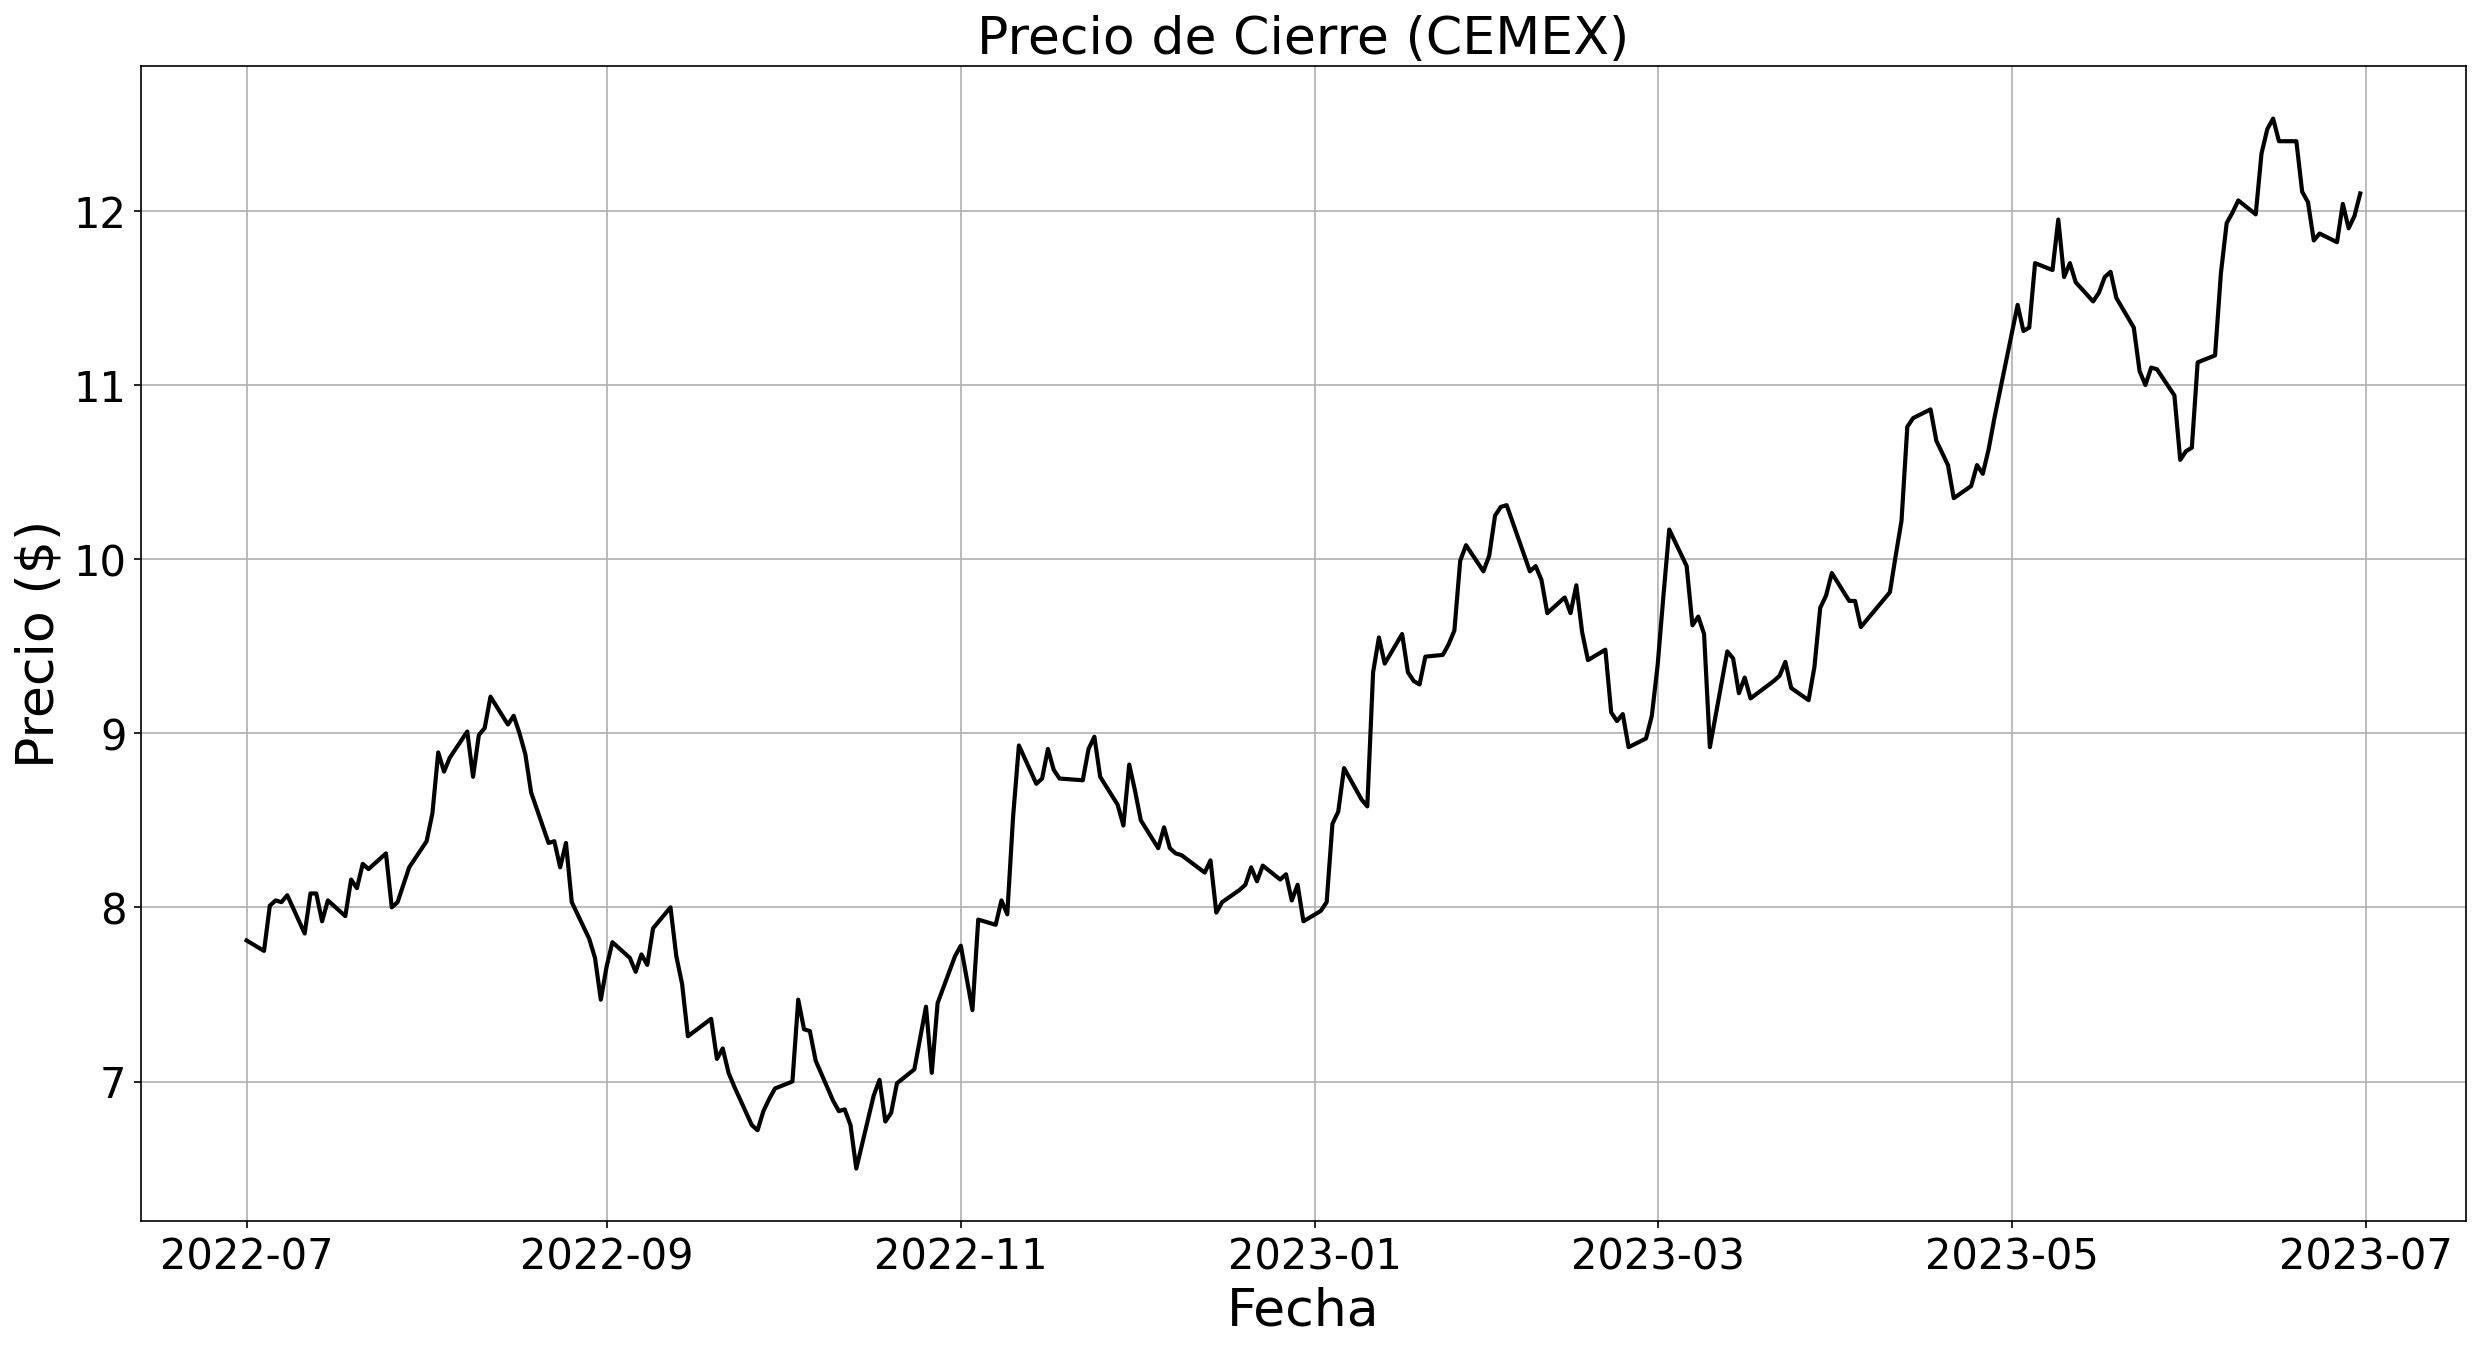

In [101]:
plt.figure(figsize=(20,10), dpi=150)
plt.plot(df.index,df["Close"],lw=2, color='black')
plt.xlabel('Fecha', fontdict = {'fontsize':25 })
plt.ylabel('Precio ($)',fontdict = {'fontsize':25 })
plt.title('Precio de Cierre (CEMEX)', fontsize = 25)
plt.tick_params(labelsize=20)
plt.grid(True)

print('Precio de cierre más bajo: ',df.loc[df.idxmin()[3]][3], ', fecha: ',df.idxmin()[3])
print('Precio de cierre más alto: ',df.loc[df.idxmax()[3]][3], ', fecha: ',df.idxmax()[3])

#### Ejercicio: Caso Walmart de México

## Contaminantes

In [51]:
ruta='https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/contam2022.csv'

In [58]:
contam = pd.read_csv(ruta, parse_dates = True, index_col=0)
contam.head()

,Centro Ozono,Centro diÛxido de azufre,Centro diÛxido de nitrÛgeno,Centro monÛxido de carbono,Centro PM10
Fecha,,,,,
2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667
2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000
2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333
2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333
2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000


In [59]:
contam.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Centro Ozono                 365 non-null    float64
 1   Centro diÛxido de azufre     365 non-null    float64
 2   Centro diÛxido de nitrÛgeno  365 non-null    float64
 3   Centro monÛxido de carbono   365 non-null    float64
 4   Centro PM10                  365 non-null    float64
dtypes: float64(5)
memory usage: 17.1 KB


In [60]:
contam.columns = ['ozono','dioxido_azufre',
                  'dioxido_nitrogeno','monoxido_carbono',
                  'PM10']

In [62]:
contam.head()

,ozono,dioxido_azufre,dioxido_nitrogeno,monoxido_carbono,PM10
Fecha,,,,,
2022-01-01,36.916667,6.333333,22.458333,10.208333,106.916667
2022-01-02,17.250000,7.750000,15.833333,9.500000,97.875000
2022-01-03,24.083333,7.833333,17.875000,5.041667,61.958333
2022-01-04,27.583333,27.416667,27.125000,8.250000,91.333333
2022-01-05,30.875000,12.833333,25.791667,9.791667,94.000000


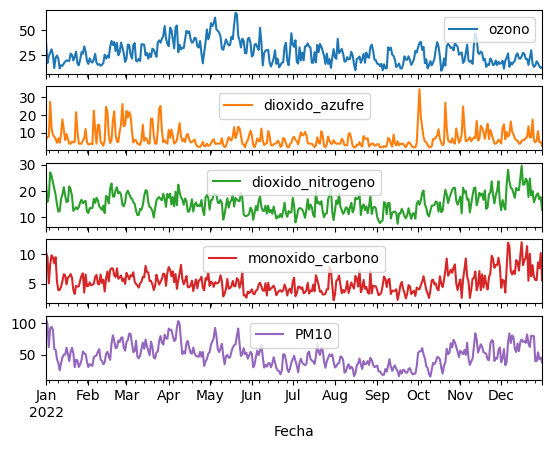

In [63]:
contam.plot(subplots=True)
plt.show()

In [67]:
np.sqrt(len(contam))

19.1049731745428

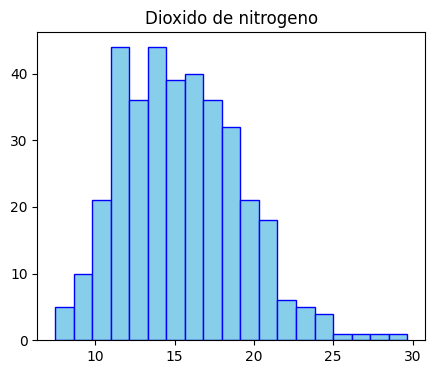

In [68]:
plt.figure(figsize=(5,4))
plt.hist(contam['dioxido_nitrogeno'], bins=19, 
         color='skyblue', edgecolor='blue')
plt.title('Dioxido de nitrogeno')
plt.show()

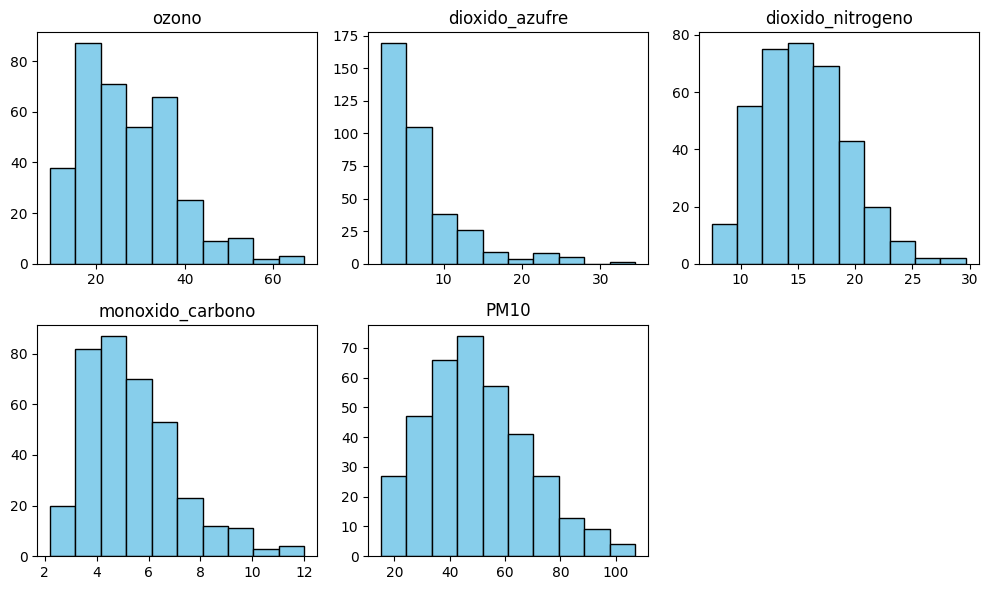

In [69]:
plt.figure(figsize=(10, 6))

plt.subplot(2,3,1) # Primer subplot
plt.hist(contam['ozono'], color='skyblue', edgecolor='black')
plt.title('ozono')

plt.subplot(2,3,2) # Segundo subplot
plt.hist(contam['dioxido_azufre'], color='skyblue', edgecolor='black')
plt.title('dioxido_azufre')

plt.subplot(2,3,3)
plt.hist(contam['dioxido_nitrogeno'], color='skyblue', edgecolor='black')
plt.title('dioxido_nitrogeno')

plt.subplot(2,3,4)
plt.hist(contam['monoxido_carbono'], color='skyblue', edgecolor='black')
plt.title('monoxido_carbono')

plt.subplot(2,3,5)
plt.hist(contam['PM10'], color='skyblue', edgecolor='black')
plt.title('PM10')

plt.tight_layout()
plt.show()

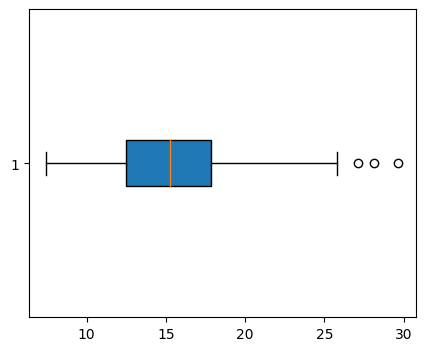

In [73]:
plt.figure(figsize=(5,4))
plt.boxplot(contam['dioxido_nitrogeno'],
            vert = False,
            patch_artist=True) # vert = False,
plt.show()

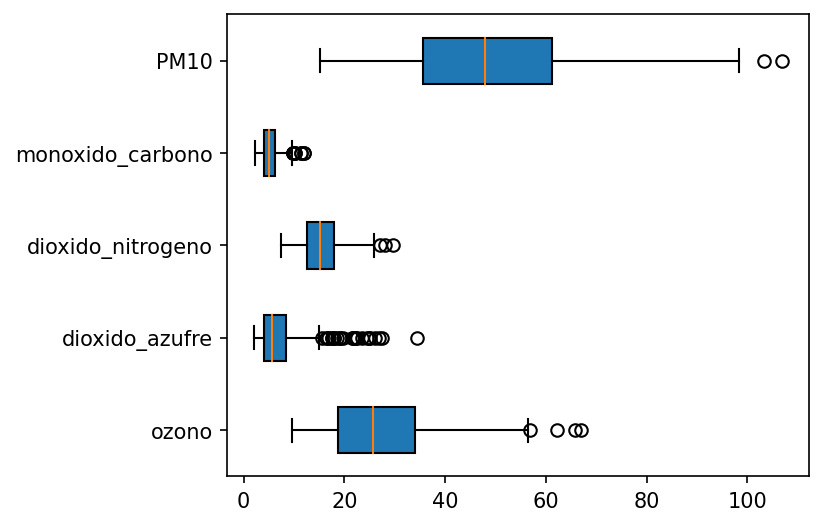

In [79]:
plt.figure(figsize=(5,4),dpi=150)
plt.boxplot(contam, labels=contam.columns, vert = False, patch_artist=True)
plt.show()